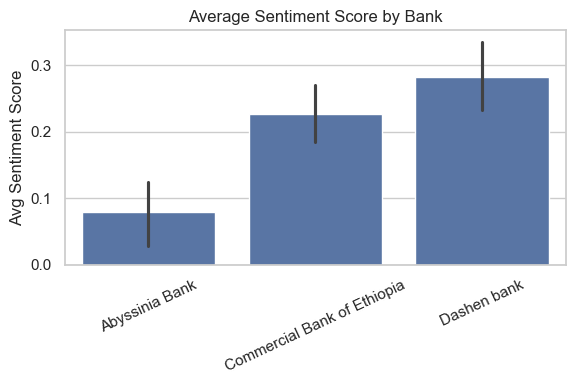

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../notebooks/bank_reviews_analysis.csv")  # file from Task2 export
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
order = df.groupby('bank_name')['sentiment_score'].mean().sort_values().index
sns.barplot(x='bank_name', y='sentiment_score', data=df, order=order)
plt.title("Average Sentiment Score by Bank")
plt.xlabel("")
plt.ylabel("Avg Sentiment Score")
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig("../figs/avg_sentiment_by_bank.png", dpi=150)
plt.show()


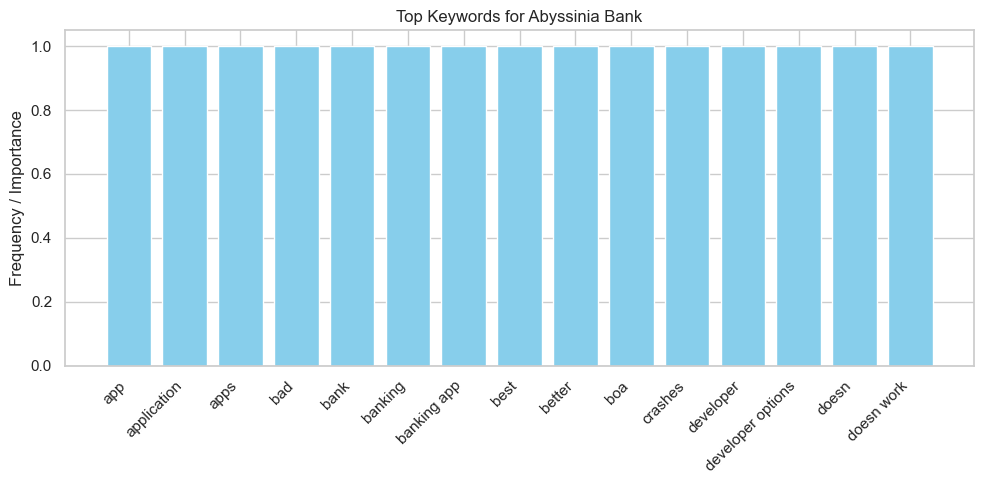

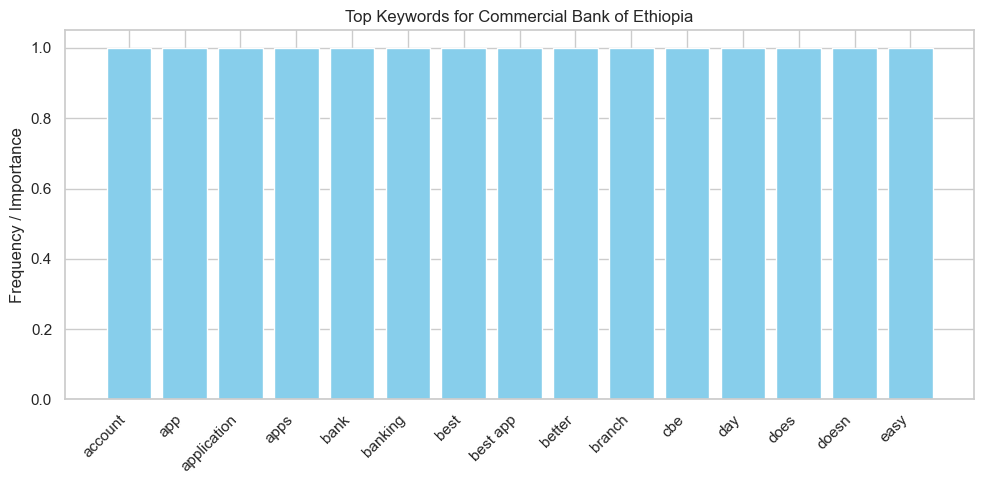

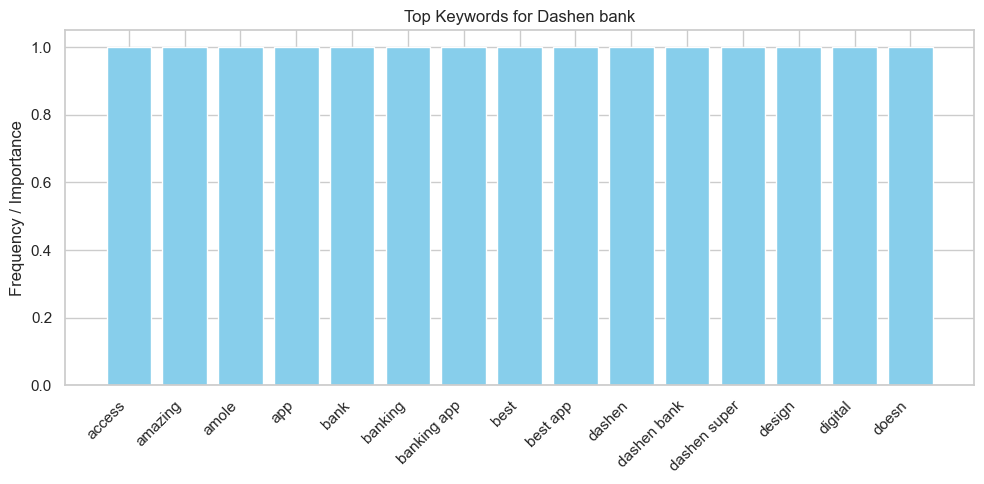

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Example: using your extracted keywords
keywords_dict = {
    "Abyssinia Bank": ['app', 'application', 'apps', 'bad', 'bank', 'banking', 'banking app', 'best',
                       'better', 'boa', 'crashes', 'developer', 'developer options', 'doesn', 'doesn work',
                       'don', 'easy', 'ethiopia', 'experience', 'fast', 'fix', 'good', 'great', 'issue',
                       'just', 'like', 'loading', 'long', 'make', 'mobile', 'mobile banking', 'money',
                       'need', 'nice', 'open', 'options', 'phone', 'problem', 'service', 'slow', 'time',
                       'times', 'transfer', 'turn', 'update', 'use', 'work', 'working', 'worst', 'worst app'],
    "Commercial Bank of Ethiopia": ['account', 'app', 'application', 'apps', 'bank', 'banking', 'best',
                                   'best app', 'better', 'branch', 'cbe', 'day', 'does', 'doesn', 'easy',
                                   'ethiopia', 'excellent', 'fast', 'fix', 'friendly', 'good', 'good app',
                                   'great', 'important', 'like', 'love', 'mobile', 'mobile banking', 'money',
                                   'new', 'nice', 'open', 'option', 'phone', 'pin', 'send', 'service',
                                   'telebirr', 'thanks', 'time', 'transaction', 'transfer', 'txn', 'update',
                                   'use', 'useful', 'user', 'work', 'working', 'works'],
    "Dashen bank": ['access', 'amazing', 'amole', 'app', 'bank', 'banking', 'banking app', 'best',
                    'best app', 'dashen', 'dashen bank', 'dashen super', 'design', 'digital', 'doesn',
                    'easy', 'easy use', 'ethiopia', 'experience', 'fast', 'features', 'friendly', 'good',
                    'great', 'like', 'makes', 'mobile', 'mobile banking', 'money', 'need', 'new', 'nice',
                    'open', 'really', 'reliable', 'service', 'slow', 'step', 'super', 'super app', 'time',
                    'ui', 'use', 'used', 'user', 'using', 'work', 'working', 'worst', 'worst app']
}

# Optional: if you have TF-IDF scores, replace Counter with dict of scores
for bank, keywords in keywords_dict.items():
    # Count keyword frequencies (or use TF-IDF scores if available)
    counts = Counter(keywords)
    top_keywords = dict(counts.most_common(15))  # top 15 keywords

    plt.figure(figsize=(10,5))
    plt.bar(top_keywords.keys(), top_keywords.values(), color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top Keywords for {bank}")
    plt.ylabel("Frequency / Importance")
    plt.tight_layout()
    plt.show()


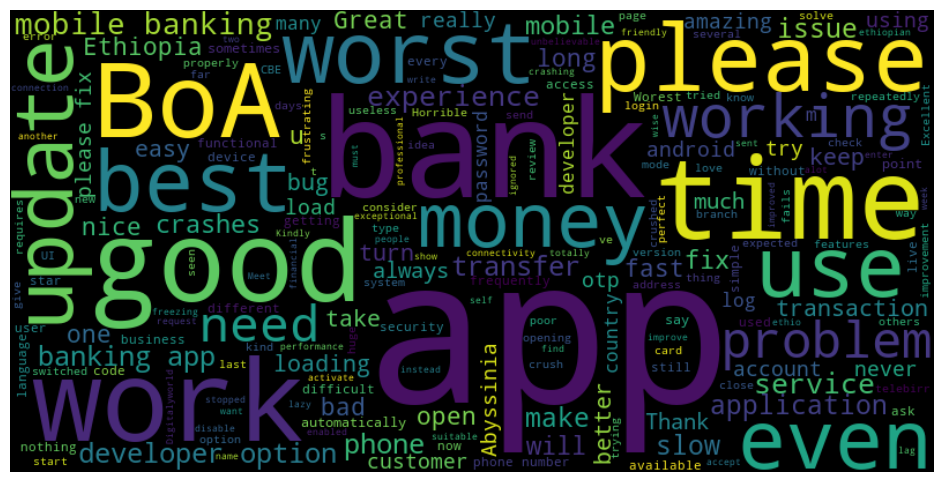

In [5]:
from wordcloud import WordCloud
text = " ".join(df[df.bank_name=="Abyssinia Bank"].review_text.dropna().astype(str).tolist())
wc = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig("../figs/abyssinia_wordcloud.png", dpi=150)
plt.show()


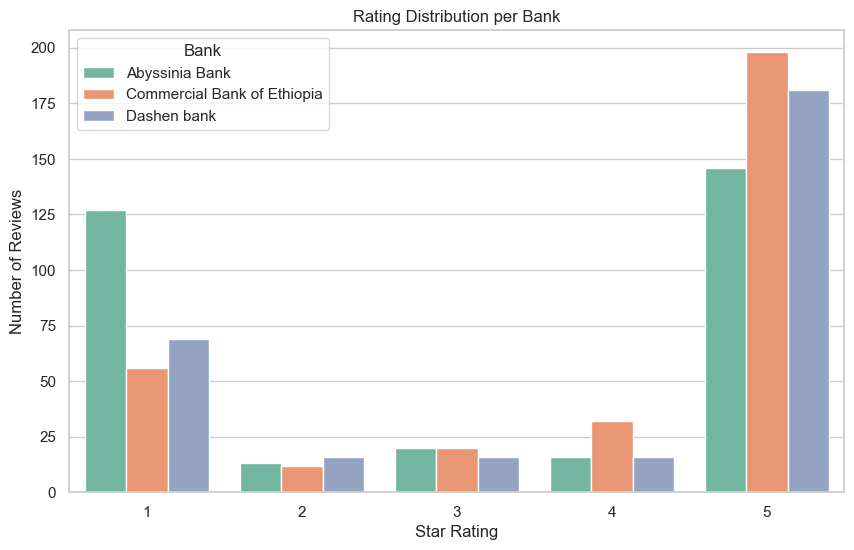

In [6]:


# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Countplot for ratings per bank
sns.countplot(x='rating', hue='bank_name', data=df, palette='Set2')
plt.title('Rating Distribution per Bank')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.show()


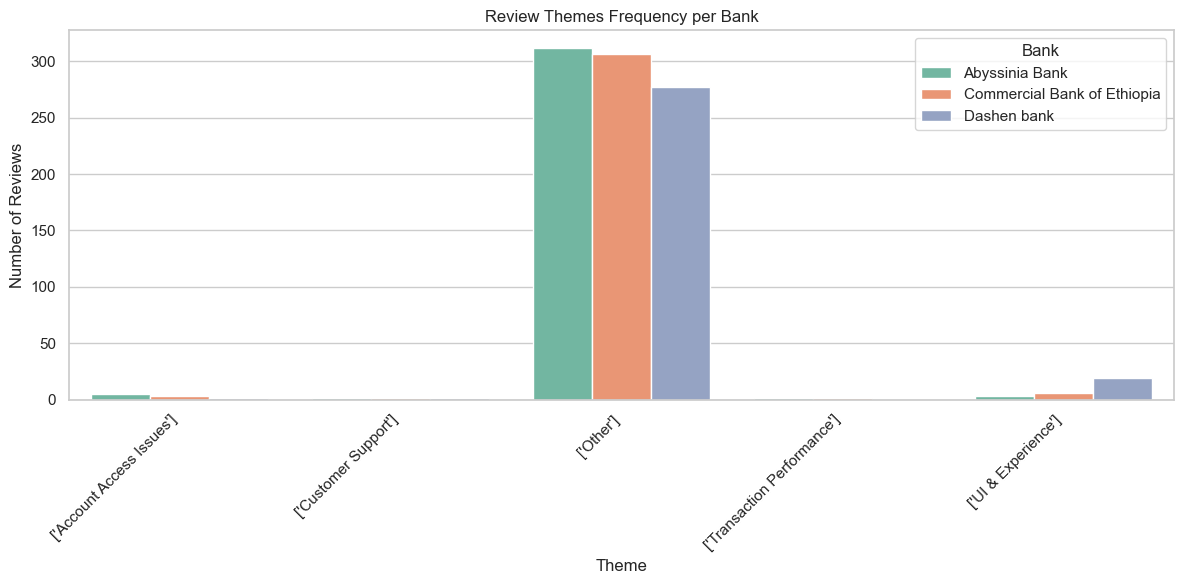

In [7]:
# Explode the themes list into separate rows
df_exploded = df.explode('themes')

# Count frequency of each theme per bank
theme_counts = df_exploded.groupby(['bank_name', 'themes']).size().reset_index(name='count')

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='themes', y='count', hue='bank_name', data=theme_counts, palette='Set2')
plt.title('Review Themes Frequency per Bank')
plt.xlabel('Theme')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bank')
plt.tight_layout()
plt.show()
